In [1]:
from ultralytics import YOLO, solutions
import cv2
import numpy as np
import matplotlib.pyplot as plt
#!pip install jupyter
#!pip install matplotlib-inline

## Cross line

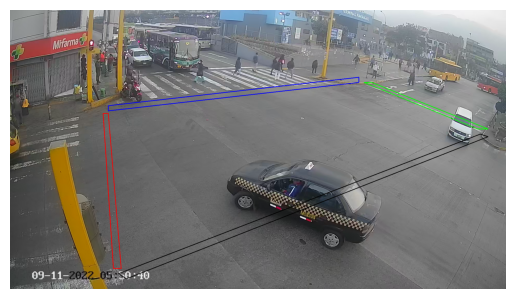

In [41]:
# Capture a frame from the video source (e.g., webcam)
cap = cv2.VideoCapture("../data/video1.mp4")
ret, frame = cap.read()
cap.release()

# Define region points
region1 = np.array([(380, 370), (380, 390),    (1350, 280), (1350, 260)], np.int32) # Blue
region2 = np.array([(1370, 280),(1400, 280),   (1850, 460), (1810, 460)], np.int32) # green
region3 = np.array([(380, 400), (360, 400),    (400, 1000), (430, 1000)], np.int32) # red
region4 = np.array([(420, 1020), (450, 1040),   (1850, 490), (1820, 480)], np.int32) # black
 
# Line thickness of 2 px
thickness = 2
cv2.polylines(frame, [region1], True, (255, 0, 0), thickness)
cv2.polylines(frame, [region2], True, (0, 255, 0), thickness)
cv2.polylines(frame, [region3], True, (0, 0, 255), thickness)
cv2.polylines(frame, [region4], True, (0, 0, 0), thickness)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.axis('off')  # Hide axis
plt.show()

## Tracking

In [2]:
model = YOLO('../models/best.pt')

In [3]:
import supervision as sv

In [ ]:
line_zone = sv.LineZone(start=START, end=END)

line_zone_annotator = sv.LineZoneAnnotator(
    thickness=4,
    text_thickness=4,
    text_scale=2)

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)
sv.plot_image(annotated_frame, (12, 12))

In [40]:
SOURCE_VIDEO_PATH = '../data/video1_test_short.mp4'
cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)
model = YOLO('../models/best.pt')
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

START = sv.Point(490, 320)
END = sv.Point(1200, 250)
line_zone = sv.LineZone(
    start=START,
    end=END
)

line_zone_annotator = sv.LineZoneAnnotatorMulticlass()
#line_zone_annotator = sv.LineZoneAnnotator(
 #   thickness=4,
 #   text_thickness=4,
 #   text_scale=2)

byte_tracker = sv.ByteTrack()

bounding_box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=1)
trace_annotator = sv.TraceAnnotator(thickness=4)


In [43]:

while cap.isOpened():
    
    ret, frame = cap.read() # carga la imagen
    results = model(frame, verbose=False)[0] # uso del modelo
    detections = sv.Detections.from_ultralytics(results)
    detections = byte_tracker.update_with_detections(detections) # tracker

    labels = [   # label de ;as tetreccion
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]

    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = bounding_box_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels)
    

    frame = line_zone_annotator.annotate(
        annotated_frame, line_zones=[line_zone]
    )
    
    line_zone.trigger(detections)
    print(line_zone.in_count, line_zone.out_count)

    cv2.imshow('im0',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


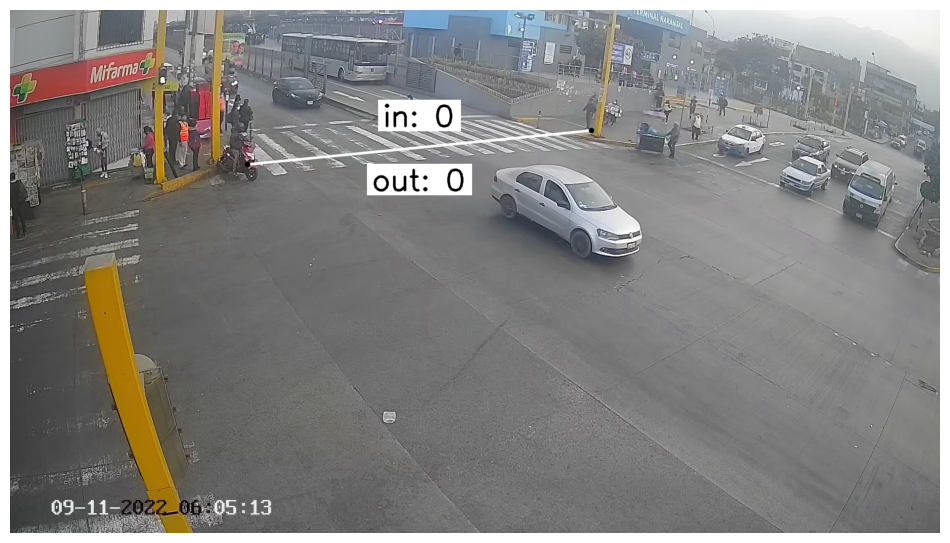

In [31]:
START = sv.Point(490, 320)
END = sv.Point(1200, 250)
'''
# Define region points
region1 = np.array([(380, 370), (380, 390),    (1350, 280), (1350, 260)], np.int32) # Blue
region2 = np.array([(1370, 280),(1400, 280),   (1850, 460), (1810, 460)], np.int32) # green
region3 = np.array([(380, 400), (360, 400),    (400, 1000), (430, 1000)], np.int32) # red
region4 = np.array([(420, 1020), (450, 1040),   (1850, 490), (1820, 480)], np.int32) # black
'''

line_zone = sv.LineZone(start=START, end=END)

line_zone_annotator = sv.LineZoneAnnotator(
    thickness=4,
    text_thickness=4,
    text_scale=2)

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)
sv.plot_image(annotated_frame, (12, 12))

In [ ]:
def callback(frame: np.ndarray, index:int) -> np.ndarray:
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = byte_tracker.update_with_detections(detections)
    

    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]

    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = bounding_box_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels)

    line_zone.trigger(detections)

    return  line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

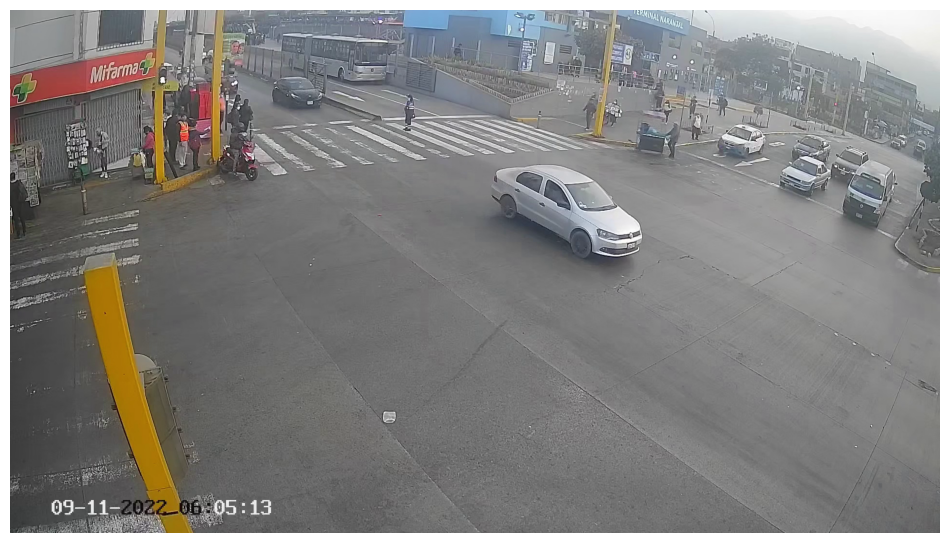

VideoInfo(width=1920, height=1080, fps=25, total_frames=187)

In [16]:
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(generator)

sv.plot_image(frame, (12, 12))
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

In [129]:
results = model(frame, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


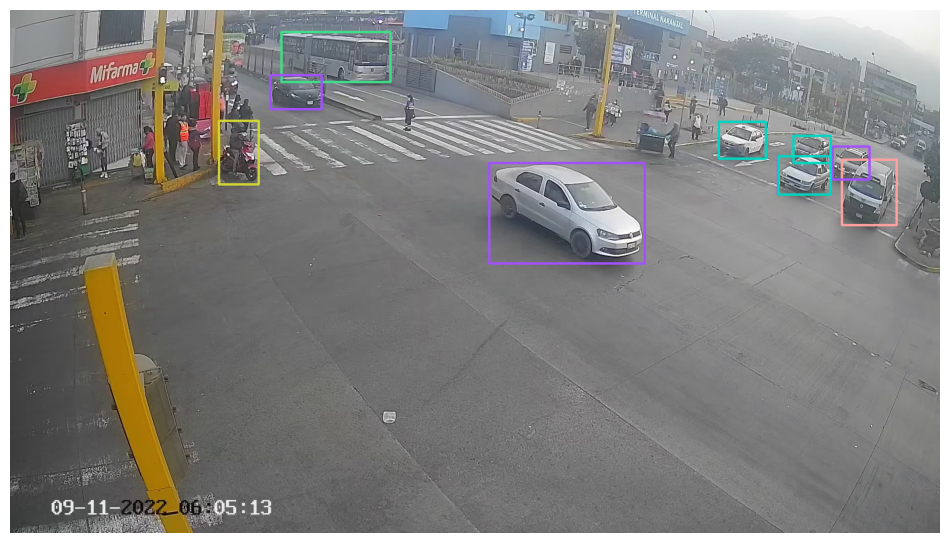

In [130]:
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=4)
annotated_frame = bounding_box_annotator.annotate(frame.copy(), detections)
sv.plot_image(annotated_frame, (12, 12))

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


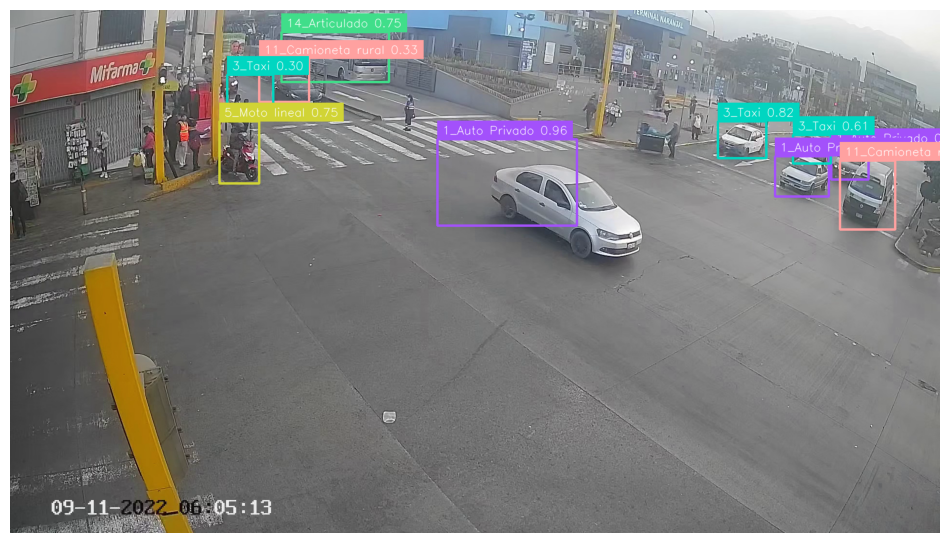

In [17]:
labels = [
    f"{results.names[class_id]} {confidence:0.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=3)
label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.8)

annotated_frame = frame.copy()
annotated_frame = bounding_box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels)
sv.plot_image(annotated_frame, (12, 12))

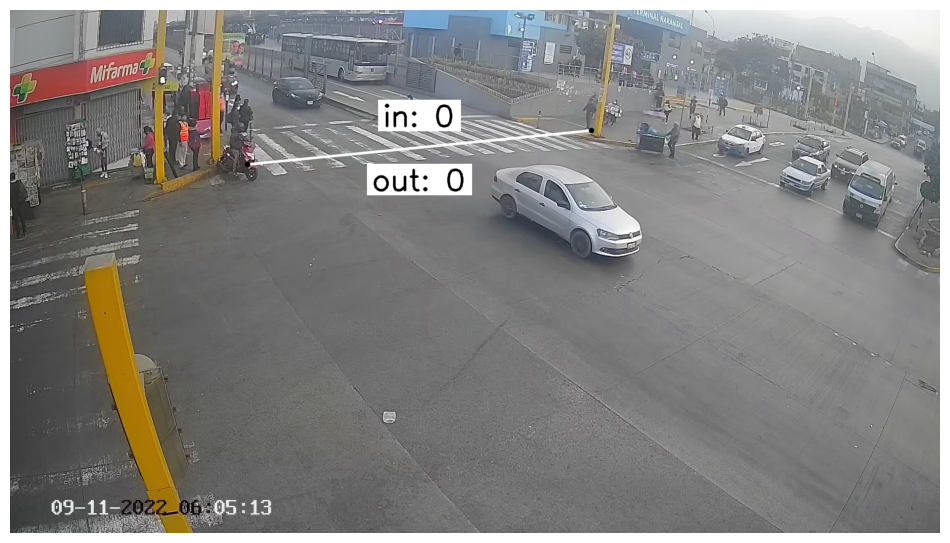

In [24]:
START = sv.Point(490, 320)
END = sv.Point(1200, 250)
'''
# Define region points
region1 = np.array([(380, 370), (380, 390),    (1350, 280), (1350, 260)], np.int32) # Blue
region2 = np.array([(1370, 280),(1400, 280),   (1850, 460), (1810, 460)], np.int32) # green
region3 = np.array([(380, 400), (360, 400),    (400, 1000), (430, 1000)], np.int32) # red
region4 = np.array([(420, 1020), (450, 1040),   (1850, 490), (1820, 480)], np.int32) # black
'''

line_zone = sv.LineZone(start=START, end=END)

line_zone_annotator = sv.LineZoneAnnotator(
    thickness=4,
    text_thickness=4,
    text_scale=2)

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)
sv.plot_image(annotated_frame, (12, 12))

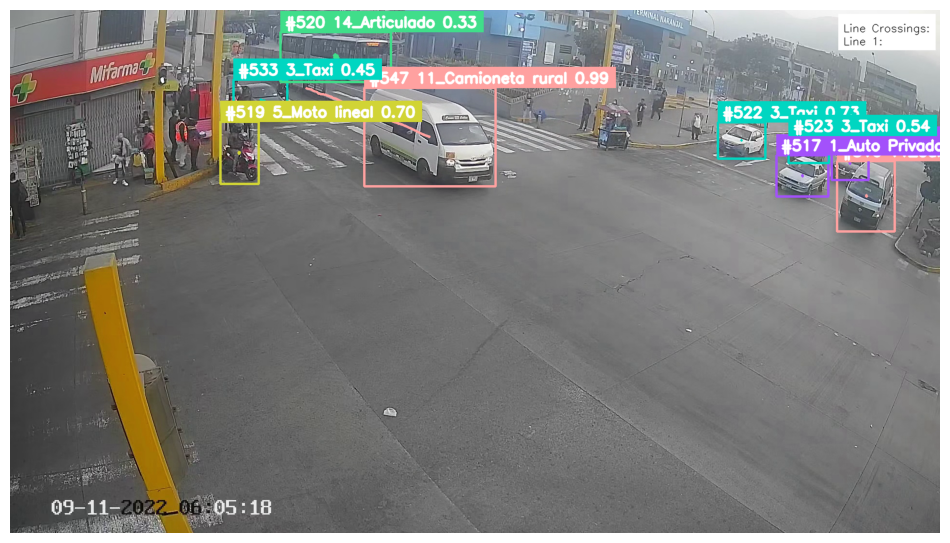

In [178]:
import supervision as sv
import cv2

START = sv.Point(490, 320)
END = sv.Point(1200, 250)

image = cv2.imread('../data/video1_test_short.mp4')

line_zone = sv.LineZone(
    start=START,
    end=END
)

line_zone_annotator = sv.LineZoneAnnotatorMulticlass()

frame = line_zone_annotator.annotate(
    frame=frame, line_zones=[line_zone]
)

sv.plot_image(frame)

In [ ]:
model = YOLO("yolo11n.pt")
image = cv.imread('../data/demo.jpg')
results = model(image, classes=[1])
for x,y,w,h in results[0].boxes.xywh:
    x, y, w, h = int(x.item()), int(y.item()), int(w.item()), int(h.item())
    dummy = cv.rectangle(image, (int(x-w/2), int(y-h/2)), (int(x + w/2), int(y + h/2)), (255, 0, 0), 2) 
plt.imshow(dummy)

In [ ]:
my_dict = model.names

values_to_find = ['banana', 'orange']

# Create a dictionary to store the result
keys_for_values = {value: [] for value in values_to_find}

# Loop through the dictionary and find keys for each value
for key, value in my_dict.items():
    if value in values_to_find:
        keys_for_values[value] = key

print(keys_for_values)

In [ ]:
for x,y,w,h in results[0].boxes.xywh:
    x, y, w, h = int(x.item()), int(y.item()), int(w.item()), int(h.item())
    print(x, y, w, h)

In [ ]:
result = model(image,classes=[1], show_boxes=True)

In [ ]:
plt.imshow(results[0].orig_img)

In [ ]:
def update_frame():
    if running:
        ret, frame = cap.read()

        ## MODEL
        tracks = model.track(frame, persist=True, show=False)
        frame = counter.start_counting(frame, tracks)
        frame = counter2.start_counting(frame, tracks)

        count1 = counter.class_wise_count
        total1 = {}
        for i in count1.keys():
            total1[i] = count1[i]['IN'] + count1[i]['OUT']
        
        count2 = counter2.class_wise_count
        total2 = {}
        for i in count2.keys():
            total2[i] = count2[i]['IN'] + count2[i]['OUT']

        # Unir diccionarios
        diccionario_unido = {}

        # Recorrer todas las claves únicas de ambos diccionarios
        for clave in set(total1.keys()).union(total2.keys()):
            valor1 = total1.get(clave, 0)  # Obtiene el valor del diccionario1 o 0 si no existe
            valor2 = total2.get(clave, 0)  # Obtiene el valor del diccionario2 o 0 si no existe

            if isinstance(valor1, int) and isinstance(valor2, int) and valor1 == 0 and valor2 == 0:
                diccionario_unido[clave] = [0,0]  # Si ambos valores son 0, poner 0 en el diccionario unido
            else:
                diccionario_unido[clave] = [valor1, valor2]  # Combinar los valores en una lista


        for i in diccionario_unido.keys():   
            update_row(i, diccionario_unido[i][0], diccionario_unido[i][1], diccionario_unido[i][1]+diccionario_unido[i][0])


        if ret:
            # Resize the frame to fit the specified dimensions
            frame = cv2.resize(frame, (FRAME_WIDTH, FRAME_HEIGHT))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame)
            imgtk = ImageTk.PhotoImage(image=img)
            label.imgtk = imgtk
            label.configure(image=imgtk)
        label.after(10, update_frame)